Factor Analysis:

--> Psychological trait profiles

Extract latent factors 

Hierarchical Clustering:

--> Explore structure and generate interpretable profiles

In [74]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


In [102]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import parse_data.prepare_data as prepare_data
import parse_data.identify_filepaths as identify_filepaths
import prepare_questionnaire_data
import globals

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/pseudonymised_json_files'
personal_data_csv = '/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/questionnaire_data/personal_data.csv'

In [396]:
questionnaire_data_df = prepare_questionnaire_data.process_items_pseudo()

AQ_scores.csv
GAD_scores.csv
BIS_scores.csv


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/questionnaire_data/prepare_questionnaire_data.py:252: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column_name] = df[column_name].replace(answers_dict[trait]).astype(int)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/questionnaire_data/prepare_questionnaire_data.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].replace(answers_dict[trait]).astype(int)
/Users/benny/Desktop/M

AQ_scores.csv
GAD_scores.csv
BIS_scores.csv


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/questionnaire_data/prepare_questionnaire_data.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{trait}_total'] = df[[f'{trait}{i}' for i in range(1, num_questions+1)]].sum(axis=1)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/questionnaire_data/prepare_questionnaire_data.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{trait}_total'] = df[[f'{trait}{i}' for i in range(1, num_questio

In [369]:
questionnaire_data_df

,pseudonym,date,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,AQ1,AQ2,AQ3,AQ4,AQ5,AQ6,AQ7,AQ8,AQ9,AQ10,BIS1,BIS2,BIS3,BIS4,BIS5,BIS6,BIS7,BIS8,GAD_total,AQ_total,BIS_total
0,AW17,2024-10-17,2,2,1,1,1,3,2,1,1,2,2,2,2,1,4,2,1,1,2,1,2,2,1,1,1,5,9,11
1,AE14,2025-03-14,2,1,2,1,1,2,1,2,4,3,4,3,4,4,3,3,2,3,2,2,2,2,2,2,2,3,2,17
2,AL01,2025-04-01,2,2,2,2,1,2,1,2,3,1,3,4,4,3,2,4,4,3,2,2,2,2,2,2,2,5,3,17
3,AW19,2025-03-19,3,2,3,2,3,2,3,2,3,3,3,3,4,4,1,4,4,3,3,3,1,3,3,2,2,11,2,20
4,AS12,2025-05-12,2,2,2,1,2,1,1,2,1,3,2,1,3,2,1,2,4,2,3,3,3,3,2,2,2,4,7,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,YY15,2025-01-15,2,1,2,1,1,2,2,2,3,1,1,1,4,2,2,1,4,2,3,2,2,2,2,2,1,4,7,16
93,YL15,2025-01-15,1,1,1,1,1,1,1,2,4,4,4,4,4,3,4,4,3,1,2,2,2,1,1,1,1,0,1,11
94,ZZ30,2025-05-30,1,1,2,2,1,1,1,2,1,1,1,1,3,1,2,3,2,1,1,1,2,2,3,1,2,2,8,13
95,ZH17,2025-10-17,2,2,2,2,1,1,2,1,2,3,2,2,2,1,2,2,1,3,4,2,2,3,2,3,2,5,9,21


Prepare data for FA

In [126]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
import matplotlib.pyplot as plt


In [397]:
questionnaire_data_df = questionnaire_data_df.drop(columns=['GAD_total','AQ_total','BIS_total'])

In [398]:
# subset item-level columns only
item_columns = [f'GAD{i}' for i in range(1, 8)] + \
               [f'AQ{i}' for i in range(1, 11)] + \
               [f'BIS{i}' for i in range(1, 9)]

X = questionnaire_data_df[item_columns]

In [399]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [400]:
import factor_analyzer as factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Bartlett’s test and Kaiser-Meyer-Olkin (KMO) to confirm FA is appropriate

chi_square_value, p_value = calculate_bartlett_sphericity(X)
kmo_all, kmo_model = calculate_kmo(X)

print("Bartlett’s test p-value:", p_value)
print("KMO measure:", kmo_model)

Bartlett’s test p-value: 1.8494879133315592e-66
KMO measure: 0.7467240440389429


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


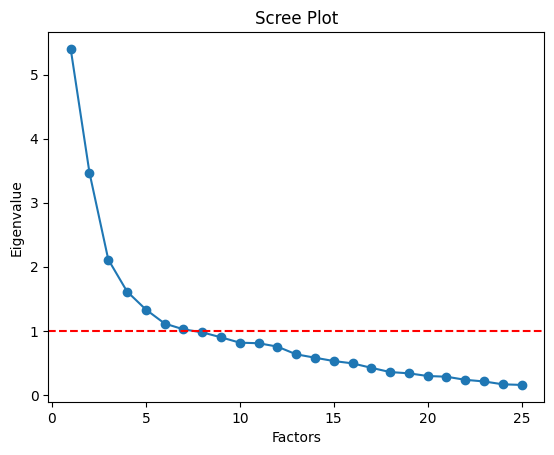

In [401]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

fa = FactorAnalyzer(n_factors=X.shape[1], rotation=None)
fa.fit(X)

eigenvalues, _ = fa.get_eigenvalues()

# Scree plot
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()


In [402]:
eigenvalues

array([5.40246783, 3.4684161 , 2.11314576, 1.61357683, 1.33259521,
       1.11363069, 1.02291035, 0.97616351, 0.89827711, 0.81459228,
       0.80584587, 0.75321062, 0.63266609, 0.58007175, 0.52770282,
       0.49146817, 0.42197742, 0.35572224, 0.33587394, 0.29400615,
       0.28306729, 0.2345758 , 0.20893742, 0.16433915, 0.15475961])

In [403]:
n_factors = 6 # testing with only 6
fa = FactorAnalyzer(n_factors=n_factors, rotation='oblimin')
fa.fit(X)

loadings = fa.loadings_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [404]:
loadings_df = pd.DataFrame(loadings, index=item_columns, columns=[f'Factor{i+1}' for i in range(n_factors)])
print(loadings_df.round(2))

      Factor1  Factor2  Factor3  Factor4  Factor5  Factor6
GAD1     0.88     0.11     0.00     0.00    -0.04     0.11
GAD2     0.89     0.06    -0.15     0.02     0.08     0.02
GAD3     0.85     0.01     0.02     0.05     0.07    -0.12
GAD4     0.70    -0.16     0.25    -0.02    -0.08    -0.02
GAD5     0.64    -0.07     0.21    -0.00    -0.07    -0.02
GAD6     0.60    -0.07    -0.01    -0.02    -0.04    -0.07
GAD7     0.66    -0.09    -0.04    -0.09    -0.08     0.00
AQ1     -0.12    -0.05    -0.15    -0.13     0.32     0.32
AQ2     -0.17     0.06     0.09     0.23     0.02     0.19
AQ3     -0.19    -0.12     0.10     0.38    -0.12     0.30
AQ4     -0.07    -0.25    -0.00     0.40    -0.11     0.27
AQ5      0.05     0.08    -0.09     0.67    -0.01     0.09
AQ6     -0.00     0.07    -0.09     0.62     0.18    -0.25
AQ7     -0.01     0.18    -0.17    -0.03     0.45     0.21
AQ8      0.04    -0.10    -0.21    -0.07     0.19     0.06
AQ9      0.08    -0.18     0.12     0.44     0.22     0.

In [405]:
factor_scores = fa.transform(X)  # shape: (n_participants, n_factors)

# Add to dataframe
for i in range(n_factors):
    questionnaire_data_df[f'Factor{i+1}'] = factor_scores[:, i]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Hierarchical clustering

In [406]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

factor_cols = [f'Factor{i+1}' for i in range(n_factors)]
X = questionnaire_data_df[factor_cols].values

In [407]:
# 1. Compute linkage matrix ('ward' method for Euclidean distance)
Z = linkage(X, method='ward')

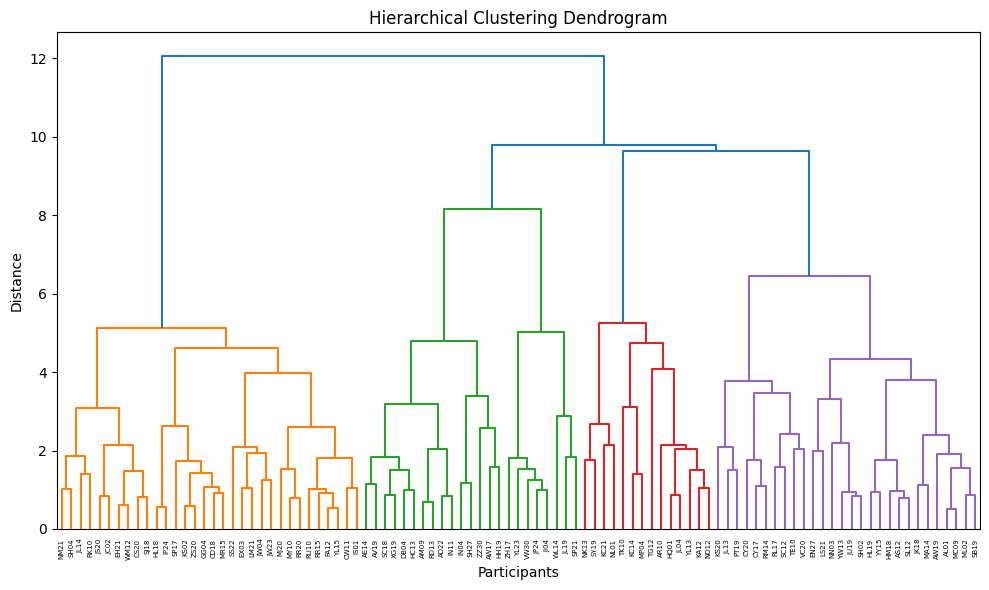

In [385]:
# 2. Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=questionnaire_data_df['pseudonym'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Participants')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [408]:
# 3. Choose number of clusters and assign cluster labels
max_clusters = 4  # choose based on dendrogram or domain knowledge
clusters = fcluster(Z, max_clusters, criterion='maxclust')

questionnaire_data_df['cluster'] = clusters

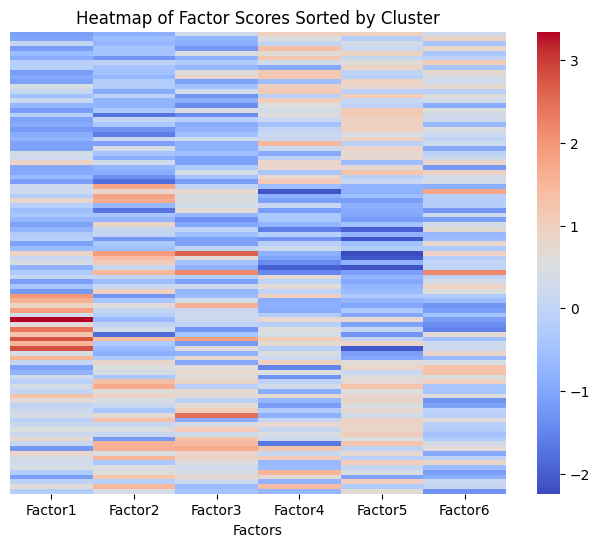

In [409]:
# 4. Visualize clusters with a heatmap of factor scores (sorted by cluster)
df_sorted = questionnaire_data_df.sort_values('cluster')
plt.figure(figsize=(8, 6))
sns.heatmap(df_sorted[factor_cols], cmap='coolwarm', yticklabels=False)
plt.title('Heatmap of Factor Scores Sorted by Cluster')
plt.xlabel('Factors')
plt.show()

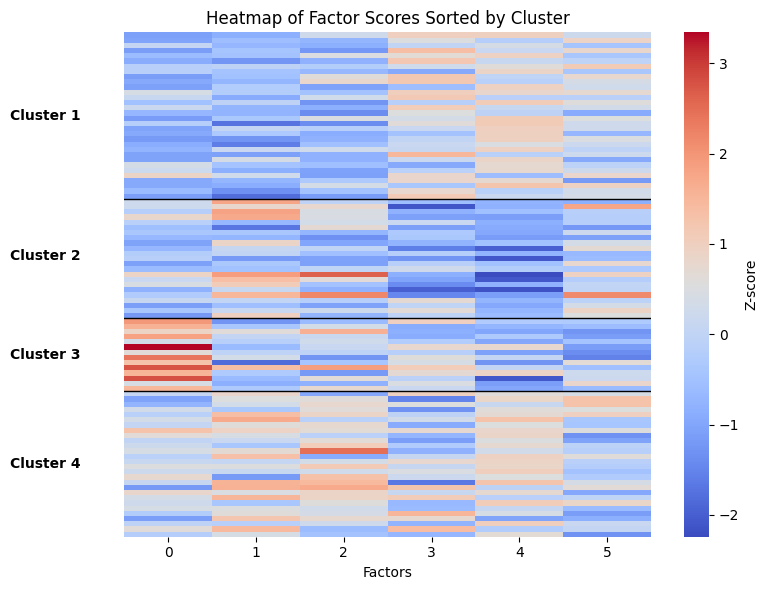

In [410]:
# Sort the DataFrame by cluster
df_sorted = questionnaire_data_df.sort_values('cluster')
factor_data = df_sorted[factor_cols].values
clusters = df_sorted['cluster'].values

# Identify where each cluster starts
unique_clusters, cluster_start_idx = np.unique(clusters, return_index=True)
cluster_start_idx = np.sort(cluster_start_idx)

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(factor_data, cmap='coolwarm', yticklabels=False, cbar_kws={"label": "Z-score"})
plt.title('Heatmap of Factor Scores Sorted by Cluster')
plt.xlabel('Factors')

# Add horizontal lines to separate clusters
for i in cluster_start_idx[1:]:  # skip the first (0)
    ax.axhline(i, color='black', linewidth=1)

# Add cluster labels on the left
midpoints = [(start + end) // 2 for start, end in zip(cluster_start_idx, list(cluster_start_idx[1:]) + [len(clusters)])]
for i, mid in enumerate(midpoints):
    ax.text(-0.5, mid, f'Cluster {unique_clusters[i]}', va='center', ha='right', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [411]:
items = ['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'AQ1', 'AQ2', 'AQ3', 'AQ4', 'AQ5', 'AQ6', 'AQ7', 'AQ8', 'AQ9', 'AQ10', 'BIS1', 'BIS2', 'BIS3', 'BIS4', 'BIS5', 'BIS6', 'BIS7', 'BIS8']

In [412]:
df_items = questionnaire_data_df[['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'AQ1', 'AQ2', 'AQ3', 'AQ4', 'AQ5', 'AQ6', 'AQ7', 'AQ8', 'AQ9', 'AQ10', 'BIS1', 'BIS2', 'BIS3', 'BIS4', 'BIS5', 'BIS6', 'BIS7', 'BIS8']]

In [413]:
cluster_means = questionnaire_data_df.groupby('cluster')[items].mean()

print(cluster_means)

                GAD1         GAD2         GAD3         GAD4         GAD5         GAD6         GAD7          AQ1          AQ2          AQ3          AQ4          AQ5          AQ6          AQ7          AQ8          AQ9         AQ10         BIS1         BIS2         BIS3         BIS4         BIS5         BIS6         BIS7         BIS8
cluster                                                                                                                                                                                                                                                                                                                                     
1        1.343750000  1.343750000  1.406250000  1.375000000  1.187500000  1.343750000  1.156250000  2.656250000  2.625000000  2.593750000  2.843750000  3.031250000  3.656250000  3.437500000  2.812500000  3.375000000  3.593750000  1.781250000  1.906250000  1.593750000  1.406250000  1.531250000  1.875000000  1.593750000  1.312500000
2

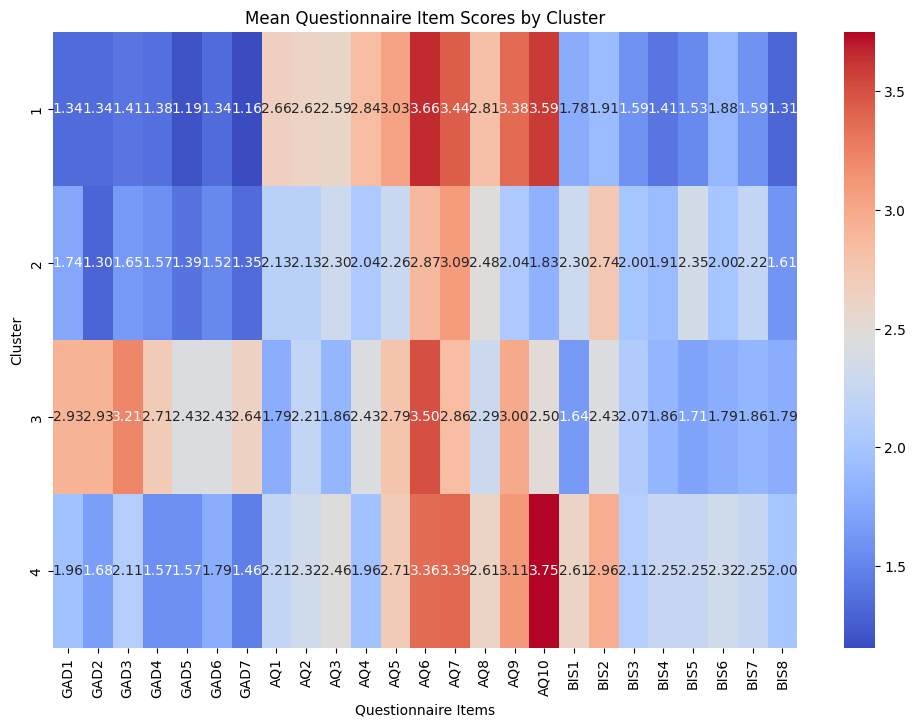

In [414]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Mean Questionnaire Item Scores by Cluster')
plt.xlabel('Questionnaire Items')
plt.ylabel('Cluster')
plt.show()


**Do the clusters identified through questionnaire profiles differ significantly in game metrics?**

In [415]:
dataframe = pd.read_csv('individual_analyses_and_questionnaire_data_table.csv', index_col=0)

In [416]:
dataframe

,experiment_date,pH_H_first_vis_combined_solo_sep1,pH_H_first_vis_combined_solo_sep2,pH_H_first_vis_combined_solo_sep4,pH_H_first_vis_combined_solo_all_seps,pH_H_first_vis_first_solo_all_seps,pH_H_first_vis_second_solo_all_seps,pH_H_first_vis_social_sep1,pH_H_first_vis_social_sep2,pH_H_first_vis_social_sep4,pH_H_first_vis_social_all_seps,pH_L_first_vis_combined_solo_sep1,pH_L_first_vis_combined_solo_sep2,pH_L_first_vis_combined_solo_sep4,pH_L_first_vis_combined_solo_all_seps,pH_L_first_vis_first_solo_all_seps,pH_L_first_vis_second_solo_all_seps,pH_L_first_vis_social_sep1,pH_L_first_vis_social_sep2,pH_L_first_vis_social_sep4,pH_L_first_vis_social_all_seps,sensory_effect_solo_sep1,sensory_effect_social_sep1,solo-social_sensory_effect_sep1,sensory_effect_solo_sep2,sensory_effect_social_sep2,solo-social_sensory_effect_sep2,sensory_effect_solo_sep4,sensory_effect_social_sep4,solo-social_sensory_effect_sep4,sensory_effect_solo_all_seps,sensory_effect_social_all_seps,solo-social_sensory_effect_all_seps,pH_opp_visible_sep_1,pH_opp_visible_sep_2,pH_opp_visible_sep_4,pH_opp_visible_all_seps,pH_opp_not_visible_sep_1,pH_opp_not_visible_sep_2,pH_opp_not_visible_sep_4,pH_opp_not_visible_all_seps,p_win_other_visible_sep_1,p_win_other_visible_sep_2,p_win_other_visible_sep_4,p_win_other_visible,p_win_other_not_visible_sep_1,p_win_other_not_visible_sep_2,p_win_other_not_visible_sep_4,p_win_other_not_visible,solo_centre_occupancy_between_trials,solo_distance_travelled_between_trials,social_centre_occupancy_between_trials,social_distance_travelled_between_trials,rt_by_traj_efficiency_first_solo,rt_by_traj_efficiency_second_solo,rt_by_traj_efficiency_combined_solo,rt_combined_solos,traj_efficiency_combined_solos,rt_by_traj_efficiency_wins,rt_by_traj_efficiency_losses,rt_wins,rt_losses,traj_efficiency_wins,traj_efficiency_losses,proportion_score,proportion_wins,scores_per_unit_time_socials,scores_per_unit_time_solos,AQ_total,GAD_total,BIS_total,opponent
SP17,2024-10-17,NaN,NaN,NaN,0.923076923,NaN,1.000000000,0.700000000,0.700000000,0.857142857,0.740740741,NaN,1.000000000,0.285714286,0.714285714,0.714285714,0.714285714,0.444444444,NaN,0.111111111,0.291666667,NaN,0.255555556,NaN,NaN,NaN,NaN,NaN,0.746031746,NaN,0.208791209,0.449074074,-0.240282865,0.833333333,0.444444444,0.375000000,0.586206897,0.685714286,0.545454545,0.444444444,0.586666667,0.428571429,0.181818182,0.083333333,0.243243243,0.518518519,0.437500000,0.538461538,0.500000000,44.304039115,46.718961524,50.179876342,33.304423309,0.707516060,0.785909117,0.792748367,0.934699194,0.650797540,0.791414960,0.742233606,0.774258661,0.733502952,0.808571259,0.750964260,0.420091324,0.396396396,5.407391081,3.647107819,1.0,1.0,21.0,AW17
VC20,2024-11-20,0.909090909,1.000000000,1.000000000,0.961538462,0.900000000,1.000000000,0.928571429,0.866666667,0.812500000,0.866666667,1.000000000,NaN,NaN,1.000000000,1.000000000,1.000000000,0.937500000,0.375000000,0.235294118,0.536585366,-0.090909091,-0.008928571,-0.081980519,NaN,0.491666667,NaN,NaN,0.577205882,NaN,-0.038461538,0.330081301,-0.368542839,1.000000000,0.750000000,0.555555556,0.825000000,0.941176471,0.696969697,0.515151515,0.752136752,0.789473684,0.666666667,0.444444444,0.675000000,0.606060606,0.714285714,0.640000000,0.645569620,80.491537545,21.126056690,85.568614236,16.837282781,0.884698878,0.872315188,0.929941170,0.919642857,0.940239483,0.920729585,0.838854318,0.860664305,0.688576212,0.980794865,0.989132423,0.703958692,0.669014085,9.932994786,6.675133394,3.0,4.0,19.0,ZS20
IN04,2025-02-04,0.909090909,NaN,1.000000000,0.947368421,0.909090909,1.000000000,1.000000000,NaN,NaN,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,NaN,NaN,0.769230769,-0.090909091,0.000000000,-0.090909091,NaN,NaN,NaN,0.000000000,NaN,NaN,-0.052631579,0.230769231,-0.283400810,1.000000000,NaN,NaN,0.923076923,1.000000000,0.875000000,0.714285714,0.923076923,0.733333333,0.800000000,0.500000000,0.692307692,0.900000000,1.000000000,0.500000000,0.866666

In [417]:
selected_colums = ['solo-social_sensory_effect_all_seps','pH_opp_visible_all_seps','pH_opp_not_visible_all_seps','p_win_other_visible','p_win_other_not_visible','solo_centre_occupancy_between_trials','solo_distance_travelled_between_trials','social_centre_occupancy_between_trials','social_distance_travelled_between_trials','rt_by_traj_efficiency_wins','rt_by_traj_efficiency_losses','scores_per_unit_time_socials','proportion_score','proportion_wins','AQ_total','GAD_total','BIS_total']

In [418]:
working_df = dataframe[selected_colums]

In [419]:
working_df = working_df.copy()

In [420]:
working_df['solo-social_centre_occupancy'] = working_df['solo_centre_occupancy_between_trials'] - working_df['social_centre_occupancy_between_trials']

In [421]:
working_df['solo-social_distance_travelled'] = working_df['solo_distance_travelled_between_trials'] - working_df['social_distance_travelled_between_trials']

In [422]:
working_df['invis-vis_opp_pH'] = working_df['pH_opp_not_visible_all_seps'] - working_df['pH_opp_visible_all_seps']

In [423]:
working_df['invis-vis_opp_pW'] = working_df['p_win_other_not_visible'] - working_df['p_win_other_visible']

In [424]:
working_df

,solo-social_sensory_effect_all_seps,pH_opp_visible_all_seps,pH_opp_not_visible_all_seps,p_win_other_visible,p_win_other_not_visible,solo_centre_occupancy_between_trials,solo_distance_travelled_between_trials,social_centre_occupancy_between_trials,social_distance_travelled_between_trials,rt_by_traj_efficiency_wins,rt_by_traj_efficiency_losses,scores_per_unit_time_socials,proportion_score,proportion_wins,AQ_total,GAD_total,BIS_total,solo-social_centre_occupancy,solo-social_distance_travelled,invis-vis_opp_pH,invis-vis_opp_pW
SP17,-0.240282865,0.586206897,0.586666667,0.243243243,0.500000000,44.304039115,46.718961524,50.179876342,33.304423309,0.791414960,0.742233606,5.407391081,0.420091324,0.396396396,1.0,1.0,21.0,-5.875837227,13.414538214,0.000459770,0.256756757
VC20,-0.368542839,0.825000000,0.752136752,0.675000000,0.645569620,80.491537545,21.126056690,85.568614236,16.837282781,0.920729585,0.838854318,9.932994786,0.703958692,0.669014085,3.0,4.0,19.0,-5.077076692,4.288773908,-0.072863248,-0.029430380
IN04,-0.283400810,0.923076923,0.923076923,0.692307692,0.866666667,85.670566501,27.183846032,85.977845189,28.556667499,0.897317460,0.726262448,12.103710986,0.746212121,0.754385965,7.0,2.0,17.0,-0.307278688,-1.372821467,0.000000000,0.174358974
JL19,-0.228243021,0.392156863,0.483870968,0.285714286,0.404255319,7.441969678,8.861930630,70.319606428,31.600459831,0.735924636,0.719421820,5.561156364,0.337545126,0.345588235,4.0,6.0,17.0,-62.877636750,-22.738529201,0.091714105,0.118541033
BC03,-0.563218391,0.400000000,0.506666667,0.214285714,0.506172840,70.277200312,27.625044320,79.519138214,30.237693154,0.703605699,0.696171667,5.821592668,0.422090730,0.466666667,NaN,NaN,NaN,-9.241937902,-2.612648835,0.106666667,0.291887125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LS21,0.345018816,0.488095238,0.457943925,0.574712644,0.680000000,2.122271545,5.416119696,4.524918286,13.811905697,0.816091292,0.801901048,9.210062373,0.602385686,0.609022556,4.0,6.0,18.0,-2.402646742,-8.395786001,-0.030151313,0.105287356
NN03,-0.202839733,0.526315789,0.493150685,0.240000000,0.290322581,75.408971062,21.043726146,82.451994362,20.256464367,0.767578989,0.785979083,3.968282342,0.269417476,0.297029703,3.0,0.0,19.0,-7.043023300,0.787261780,-0.033165105,0.050322581
KS20,0.390804598,0.425000000,0.421686747,0.656250000,0.750000000,2.673740612,10.659818961,3.527017607,11.822010441,0.887201583,0.742945312,8.557664189,0.621923937,0.626984127,2.0,0.0,19.0,-0.853276996,-1.162191480,-0.003313253,0.093750000
HQ01,0.061538462,0.514563107,0.532710280,0.550458716,0.500000000,11.588095624,29.723715764,10.773256920,25.137787581,0.780042984,0.724058531,11.109398910,0.555555556,0.555555556,6.0,13.0,18.0,0.814838704,4.585928182,0.018147174,-0.050458716


In [425]:
questionnaire_data_df = questionnaire_data_df.set_index('pseudonym')

In [426]:
working_df = working_df.merge(questionnaire_data_df[['cluster']],left_index=True, right_index=True, how='inner')

In [427]:
working_df

,solo-social_sensory_effect_all_seps,pH_opp_visible_all_seps,pH_opp_not_visible_all_seps,p_win_other_visible,p_win_other_not_visible,solo_centre_occupancy_between_trials,solo_distance_travelled_between_trials,social_centre_occupancy_between_trials,social_distance_travelled_between_trials,rt_by_traj_efficiency_wins,rt_by_traj_efficiency_losses,scores_per_unit_time_socials,proportion_score,proportion_wins,AQ_total,GAD_total,BIS_total,solo-social_centre_occupancy,solo-social_distance_travelled,invis-vis_opp_pH,invis-vis_opp_pW,cluster
SP17,-0.240282865,0.586206897,0.586666667,0.243243243,0.500000000,44.304039115,46.718961524,50.179876342,33.304423309,0.791414960,0.742233606,5.407391081,0.420091324,0.396396396,1.0,1.0,21.0,-5.875837227,13.414538214,0.000459770,0.256756757,1
VC20,-0.368542839,0.825000000,0.752136752,0.675000000,0.645569620,80.491537545,21.126056690,85.568614236,16.837282781,0.920729585,0.838854318,9.932994786,0.703958692,0.669014085,3.0,4.0,19.0,-5.077076692,4.288773908,-0.072863248,-0.029430380,4
IN04,-0.283400810,0.923076923,0.923076923,0.692307692,0.866666667,85.670566501,27.183846032,85.977845189,28.556667499,0.897317460,0.726262448,12.103710986,0.746212121,0.754385965,7.0,2.0,17.0,-0.307278688,-1.372821467,0.000000000,0.174358974,2
JL19,-0.228243021,0.392156863,0.483870968,0.285714286,0.404255319,7.441969678,8.861930630,70.319606428,31.600459831,0.735924636,0.719421820,5.561156364,0.337545126,0.345588235,4.0,6.0,17.0,-62.877636750,-22.738529201,0.091714105,0.118541033,2
NM21,-0.529713424,0.526315789,0.474358974,0.333333333,0.313253012,75.332013330,24.168250485,79.707658894,25.087387164,0.751797774,0.795642297,4.137496404,0.302605210,0.328358209,4.0,1.0,17.0,-4.375645564,-0.919136679,-0.051956815,-0.020080321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LS21,0.345018816,0.488095238,0.457943925,0.574712644,0.680000000,2.122271545,5.416119696,4.524918286,13.811905697,0.816091292,0.801901048,9.210062373,0.602385686,0.609022556,4.0,6.0,18.0,-2.402646742,-8.395786001,-0.030151313,0.105287356,4
NN03,-0.202839733,0.526315789,0.493150685,0.240000000,0.290322581,75.408971062,21.043726146,82.451994362,20.256464367,0.767578989,0.785979083,3.968282342,0.269417476,0.297029703,3.0,0.0,19.0,-7.043023300,0.787261780,-0.033165105,0.050322581,4
KS20,0.390804598,0.425000000,0.421686747,0.656250000,0.750000000,2.673740612,10.659818961,3.527017607,11.822010441,0.887201583,0.742945312,8.557664189,0.621923937,0.626984127,2.0,0.0,19.0,-0.853276996,-1.162191480,-0.003313253,0.093750000,4
HQ01,0.061538462,0.514563107,0.532710280,0.550458716,0.500000000,11.588095624,29.723715764,10.773256920,25.137787581,0.780042984,0.724058531,11.109398910,0.555555556,0.555555556,6.0,13.0,18.0,0.814838704,4.585928182,0.018147174,-0.050458716,3


Means per cluster

In [428]:
selected_colums_n = ['solo-social_sensory_effect_all_seps','pH_opp_visible_all_seps','pH_opp_not_visible_all_seps','p_win_other_visible','p_win_other_not_visible','solo_centre_occupancy_between_trials','solo_distance_travelled_between_trials','social_centre_occupancy_between_trials','social_distance_travelled_between_trials','solo-social_centre_occupancy','solo-social_distance_travelled','invis-vis_opp_pH','invis-vis_opp_pW','rt_by_traj_efficiency_wins','rt_by_traj_efficiency_losses','scores_per_unit_time_socials','proportion_score','proportion_wins']

In [429]:
working_df.groupby('cluster')[selected_colums_n].mean()

,solo-social_sensory_effect_all_seps,pH_opp_visible_all_seps,pH_opp_not_visible_all_seps,p_win_other_visible,p_win_other_not_visible,solo_centre_occupancy_between_trials,solo_distance_travelled_between_trials,social_centre_occupancy_between_trials,social_distance_travelled_between_trials,solo-social_centre_occupancy,solo-social_distance_travelled,invis-vis_opp_pH,invis-vis_opp_pW,rt_by_traj_efficiency_wins,rt_by_traj_efficiency_losses,scores_per_unit_time_socials,proportion_score,proportion_wins
cluster,,,,,,,,,,,,,,,,,,
1,-0.068736750,0.568557120,0.580382525,0.457124089,0.509608420,56.532532971,26.290143161,59.064020308,26.870681235,-2.531487336,-0.580538074,0.011825405,0.052484331,0.809950690,0.762196297,7.760589763,0.496477933,0.491546444
2,-0.212280969,0.596249105,0.578702846,0.471835612,0.512948492,60.055035282,26.764149558,64.127923596,26.272873521,-4.072888314,0.491276037,-0.013968856,0.041112880,0.828292277,0.774404373,7.039322969,0.490880214,0.495007240
3,-0.276409368,0.558054578,0.558365023,0.427184544,0.498434168,53.838941946,27.220995754,68.471993751,32.801399270,-13.309301316,-5.899205142,0.000310446,0.071249624,0.805985065,0.743508320,7.373352681,0.462939737,0.463376157
4,-0.178133212,0.587880454,0.574701286,0.490089746,0.542341094,58.769119255,30.073931100,64.623071647,29.482976878,-5.853952392,-0.591903046,-0.013179167,0.052251348,0.822706311,0.757137665,7.791095791,0.518725207,0.520536964


Variability per cluster

Text(0.5, 1.0, 'Efficiency Effect Social Wins by Cluster')

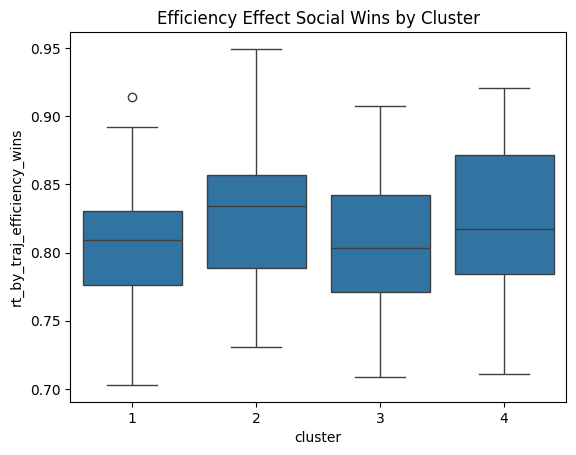

In [430]:
sns.boxplot(data=working_df, x='cluster', y='rt_by_traj_efficiency_wins')
plt.title('Efficiency Effect Social Wins by Cluster')

Text(0.5, 1.0, 'Efficiency Effect Social Losses by Cluster')

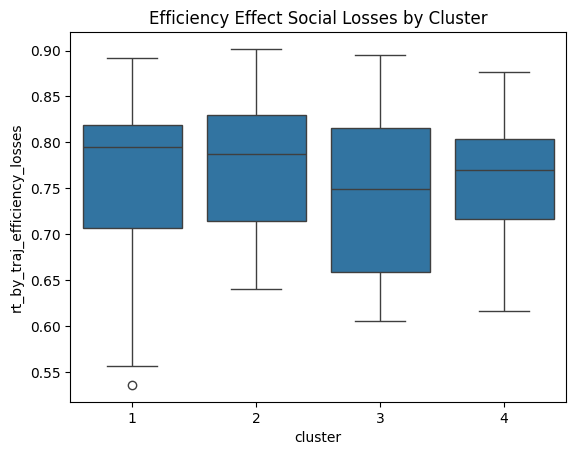

In [431]:
sns.boxplot(data=working_df, x='cluster', y='rt_by_traj_efficiency_losses')
plt.title('Efficiency Effect Social Losses by Cluster')

Text(0.5, 1.0, 'Sensory Effect Solo-Social by Cluster')

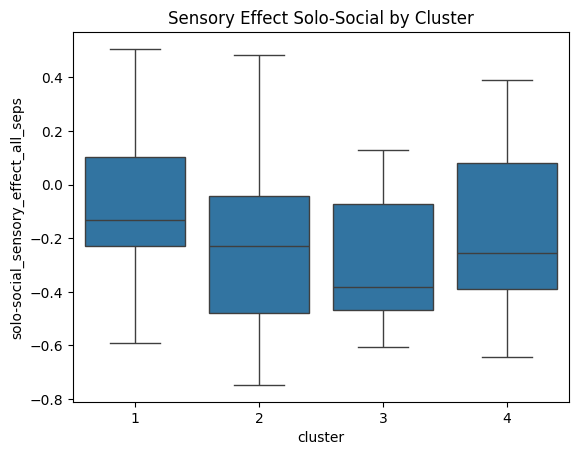

In [432]:
sns.boxplot(data=working_df, x='cluster', y='solo-social_sensory_effect_all_seps')
plt.title('Sensory Effect Solo-Social by Cluster')

Text(0.5, 1.0, 'Centre Occupancy Between Trials Solo-Social')

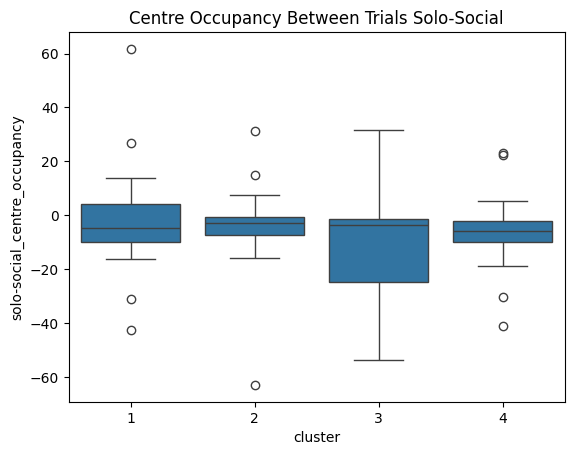

In [433]:
sns.boxplot(data=working_df, x='cluster', y='solo-social_centre_occupancy')
plt.title('Centre Occupancy Between Trials Solo-Social')

Text(0.5, 1.0, 'Distance Traveled Between Trials Solo-Social')

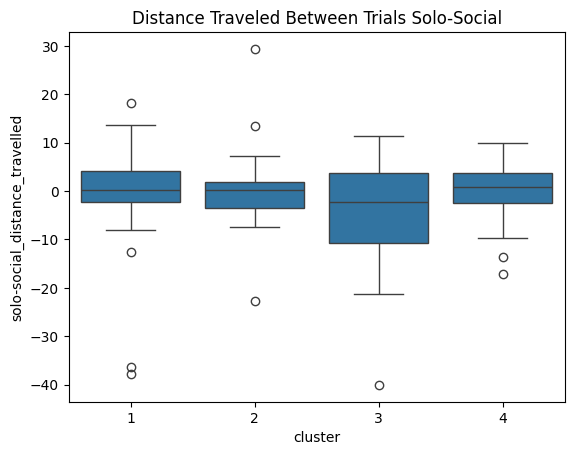

In [434]:
sns.boxplot(data=working_df, x='cluster', y='solo-social_distance_travelled')
plt.title('Distance Traveled Between Trials Solo-Social')

Text(0.5, 1.0, 'pH Opponent Invisible - Visible')

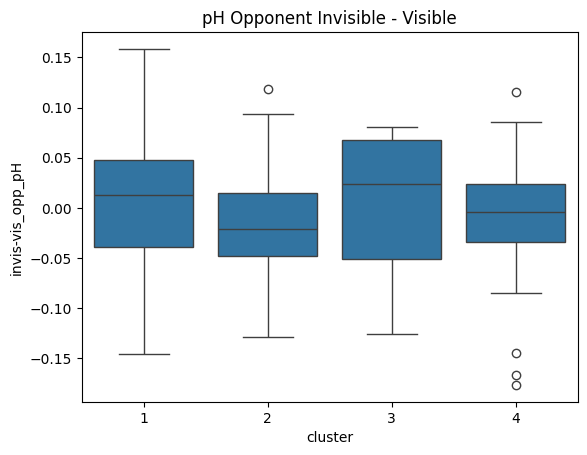

In [435]:
sns.boxplot(data=working_df, x='cluster', y='invis-vis_opp_pH')
plt.title('pH Opponent Invisible - Visible')

Text(0.5, 1.0, 'pW Opponent Invisible - Visible')

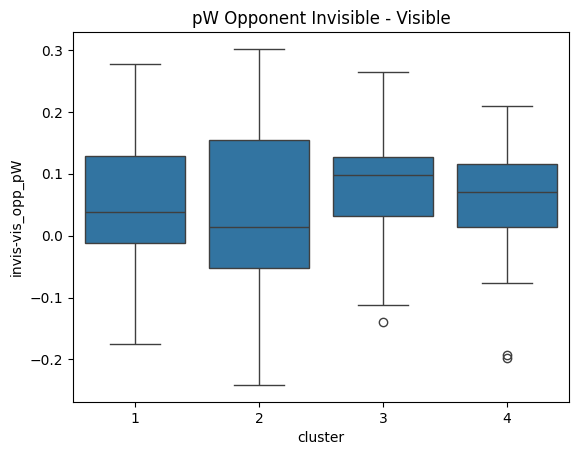

In [436]:
sns.boxplot(data=working_df, x='cluster', y='invis-vis_opp_pW')
plt.title('pW Opponent Invisible - Visible')

Text(0.5, 1.0, 'Scores Per Unit Time in Socials by Cluster')

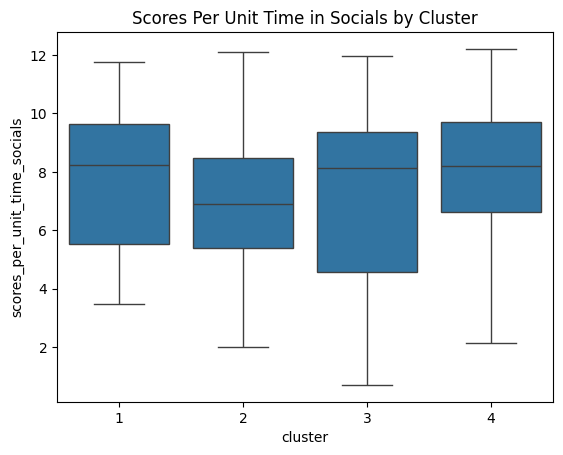

In [437]:
sns.boxplot(data=working_df, x='cluster', y='scores_per_unit_time_socials')
plt.title('Scores Per Unit Time in Socials by Cluster')

Text(0.5, 1.0, 'Proportion Scores in Socials by Cluster')

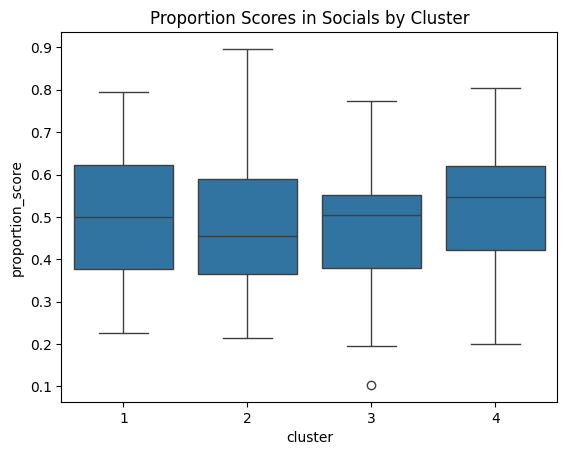

In [438]:
sns.boxplot(data=working_df, x='cluster', y='proportion_score')
plt.title('Proportion Scores in Socials by Cluster')

Text(0.5, 1.0, 'Proportion Wins in Socials by Cluster')

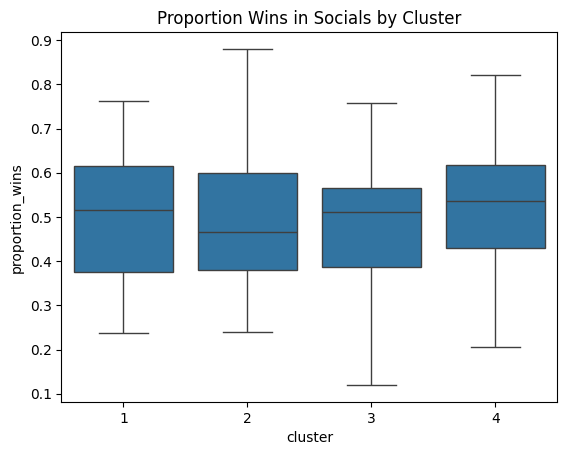

In [439]:
sns.boxplot(data=working_df, x='cluster', y='proportion_wins')
plt.title('Proportion Wins in Socials by Cluster')

Statistical testing

In [440]:
# remove nans
groups = [working_df[working_df['cluster'] == c]['solo-social_sensory_effect_all_seps'].dropna() for c in working_df['cluster'].unique()]


In [441]:
from scipy.stats import f_oneway, kruskal

# Example: opponent effect
#groups = [working_df[working_df['cluster'] == c]['solo-social_sensory_effect_all_seps'] for c in working_df['cluster'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p =", p_val, f_stat)

ANOVA p = 0.13275089526726827 1.9141974745598604


In [442]:
groups = [working_df[working_df['cluster'] == c]['social_centre_occupancy_between_trials'].dropna() for c in working_df['cluster'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p =", p_val, f_stat)

ANOVA p = 0.7103110808917339 0.46083057089148743


In [443]:
groups = [working_df[working_df['cluster'] == c]['solo-social_centre_occupancy'].dropna() for c in working_df['cluster'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p =", p_val, f_stat)

ANOVA p = 0.2846237662047799 1.2839233581219187


In [444]:
groups = [working_df[working_df['cluster'] == c]['social_distance_travelled_between_trials'].dropna() for c in working_df['cluster'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p =", p_val, f_stat)

ANOVA p = 0.5232172619107756 0.7532845339023659


In [445]:
groups = [working_df[working_df['cluster'] == c]['solo-social_distance_travelled'].dropna() for c in working_df['cluster'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p =", p_val, f_stat)

ANOVA p = 0.2991765373235377 1.2419900598040052


In [446]:
groups = [working_df[working_df['cluster'] == c]['invis-vis_opp_pH'].dropna() for c in working_df['cluster'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p =", p_val, f_stat)

ANOVA p = 0.4311050796735906 0.9268489079793107


In [447]:
groups = [working_df[working_df['cluster'] == c]['invis-vis_opp_pW'].dropna() for c in working_df['cluster'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p =", p_val, f_stat)

ANOVA p = 0.8965167582636554 0.19945246135665978


In [448]:
groups = [working_df[working_df['cluster'] == c]['rt_by_traj_efficiency_wins'].dropna() for c in working_df['cluster'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p =", p_val, f_stat)

ANOVA p = 0.5086281085921314 0.7789765482946371


In [449]:
groups = [working_df[working_df['cluster'] == c]['rt_by_traj_efficiency_losses'].dropna() for c in working_df['cluster'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p =", p_val, f_stat)

ANOVA p = 0.709417565965277 0.4621099285583722


In [450]:
groups = [working_df[working_df['cluster'] == c]['scores_per_unit_time_socials'].dropna() for c in working_df['cluster'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p =", p_val, f_stat)

ANOVA p = 0.7014837498948533 0.4735022851963833


In [451]:
groups = [working_df[working_df['cluster'] == c]['proportion_score'].dropna() for c in working_df['cluster'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p =", p_val, f_stat)

ANOVA p = 0.7710224920556723 0.37528673421695785


In [452]:
groups = [working_df[working_df['cluster'] == c]['proportion_wins'].dropna() for c in working_df['cluster'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA p =", p_val, f_stat)

ANOVA p = 0.7156519246100859 0.4531982514364789


**Do total scores on individual questionnaires significantly predict performance and/or strategy metrics?**

In [311]:
working_df

,solo-social_sensory_effect_all_seps,pH_opp_visible_all_seps,pH_opp_not_visible_all_seps,p_win_other_visible,p_win_other_not_visible,solo_centre_occupancy_between_trials,solo_distance_travelled_between_trials,social_centre_occupancy_between_trials,social_distance_travelled_between_trials,scores_per_unit_time_socials,proportion_score,proportion_wins,AQ_total,GAD_total,BIS_total,solo-social_centre_occupancy,solo-social_distance_travelled,invis-vis_opp_pH,invis-vis_opp_pW,cluster
SP17,-0.240282865,0.586206897,0.586666667,0.243243243,0.500000000,44.304039115,46.718961524,50.179876342,33.304423309,5.407391081,0.420091324,0.396396396,1.0,1.0,21.0,-5.875837227,13.414538214,0.000459770,0.256756757,3
VC20,-0.368542839,0.825000000,0.752136752,0.675000000,0.645569620,80.491537545,21.126056690,85.568614236,16.837282781,9.932994786,0.703958692,0.669014085,3.0,4.0,19.0,-5.077076692,4.288773908,-0.072863248,-0.029430380,4
IN04,-0.283400810,0.923076923,0.923076923,0.692307692,0.866666667,85.670566501,27.183846032,85.977845189,28.556667499,12.103710986,0.746212121,0.754385965,7.0,2.0,17.0,-0.307278688,-1.372821467,0.000000000,0.174358974,2
JL19,-0.228243021,0.392156863,0.483870968,0.285714286,0.404255319,7.441969678,8.861930630,70.319606428,31.600459831,5.561156364,0.337545126,0.345588235,4.0,6.0,17.0,-62.877636750,-22.738529201,0.091714105,0.118541033,2
NM21,-0.529713424,0.526315789,0.474358974,0.333333333,0.313253012,75.332013330,24.168250485,79.707658894,25.087387164,4.137496404,0.302605210,0.328358209,4.0,1.0,17.0,-4.375645564,-0.919136679,-0.051956815,-0.020080321,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LS21,0.345018816,0.488095238,0.457943925,0.574712644,0.680000000,2.122271545,5.416119696,4.524918286,13.811905697,9.210062373,0.602385686,0.609022556,4.0,6.0,18.0,-2.402646742,-8.395786001,-0.030151313,0.105287356,3
NN03,-0.202839733,0.526315789,0.493150685,0.240000000,0.290322581,75.408971062,21.043726146,82.451994362,20.256464367,3.968282342,0.269417476,0.297029703,3.0,0.0,19.0,-7.043023300,0.787261780,-0.033165105,0.050322581,3
KS20,0.390804598,0.425000000,0.421686747,0.656250000,0.750000000,2.673740612,10.659818961,3.527017607,11.822010441,8.557664189,0.621923937,0.626984127,2.0,0.0,19.0,-0.853276996,-1.162191480,-0.003313253,0.093750000,4
HQ01,0.061538462,0.514563107,0.532710280,0.550458716,0.500000000,11.588095624,29.723715764,10.773256920,25.137787581,11.109398910,0.555555556,0.555555556,6.0,13.0,18.0,0.814838704,4.585928182,0.018147174,-0.050458716,1


In [453]:
import statsmodels.api as sm

# Define predictors and outcome
X = working_df[['GAD_total', 'AQ_total', 'BIS_total']].dropna()
y = working_df.loc[X.index, 'scores_per_unit_time_socials'].dropna()

# Re-align in case of any NaN mismatch
X = X.loc[y.index]
X = sm.add_constant(X)  # Adds intercept term

# Fit regression model
model = sm.OLS(y, X).fit()

# View results
print(model.summary())


                                 OLS Regression Results                                 
Dep. Variable:     scores_per_unit_time_socials   R-squared:                       0.040
Model:                                      OLS   Adj. R-squared:                  0.009
Method:                           Least Squares   F-statistic:                     1.287
Date:                          Sun, 08 Jun 2025   Prob (F-statistic):              0.284
Time:                                  21:04:21   Log-Likelihood:                -226.40
No. Observations:                            97   AIC:                             460.8
Df Residuals:                                93   BIC:                             471.1
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [454]:
import statsmodels.api as sm

# Define predictors and outcome
X = working_df[['GAD_total', 'AQ_total', 'BIS_total']].dropna()
y = working_df.loc[X.index, 'proportion_score'].dropna()

# Re-align in case of any NaN mismatch
X = X.loc[y.index]
X = sm.add_constant(X)  # Adds intercept term

# Fit regression model
model = sm.OLS(y, X).fit()

# View results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       proportion_score   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.2104
Date:                Sun, 08 Jun 2025   Prob (F-statistic):              0.889
Time:                        21:04:31   Log-Likelihood:                 39.453
No. Observations:                  97   AIC:                            -70.91
Df Residuals:                      93   BIC:                            -60.61
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5159      0.160      3.216      0.0

In [455]:
import statsmodels.api as sm

# Define predictors and outcome
X = working_df[['GAD_total', 'AQ_total', 'BIS_total']].dropna()
y = working_df.loc[X.index, 'proportion_wins'].dropna()

# Re-align in case of any NaN mismatch
X = X.loc[y.index]
X = sm.add_constant(X)  # Adds intercept term

# Fit regression model
model = sm.OLS(y, X).fit()

# View results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        proportion_wins   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.1521
Date:                Sun, 08 Jun 2025   Prob (F-statistic):              0.928
Time:                        21:04:35   Log-Likelihood:                 45.215
No. Observations:                  97   AIC:                            -82.43
Df Residuals:                      93   BIC:                            -72.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5012      0.151      3.315      0.0

In [456]:
import statsmodels.api as sm

# Define predictors and outcome
X = working_df[['GAD_total', 'AQ_total', 'BIS_total']].dropna()
y = working_df.loc[X.index, 'rt_by_traj_efficiency_wins'].dropna()

# Re-align in case of any NaN mismatch
X = X.loc[y.index]
X = sm.add_constant(X)  # Adds intercept term

# Fit regression model
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     rt_by_traj_efficiency_wins   R-squared:                       0.003
Model:                                    OLS   Adj. R-squared:                 -0.029
Method:                         Least Squares   F-statistic:                   0.08727
Date:                        Sun, 08 Jun 2025   Prob (F-statistic):              0.967
Time:                                21:04:41   Log-Likelihood:                 144.35
No. Observations:                          97   AIC:                            -280.7
Df Residuals:                              93   BIC:                            -270.4
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [457]:
import statsmodels.api as sm

# Define predictors and outcome
X = working_df[['GAD_total', 'AQ_total', 'BIS_total']].dropna()
y = working_df.loc[X.index, 'rt_by_traj_efficiency_losses'].dropna()

# Re-align in case of any NaN mismatch
X = X.loc[y.index]
X = sm.add_constant(X)  # Adds intercept term

# Fit regression model
model = sm.OLS(y, X).fit()

# View results
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     rt_by_traj_efficiency_losses   R-squared:                       0.020
Model:                                      OLS   Adj. R-squared:                 -0.012
Method:                           Least Squares   F-statistic:                    0.6230
Date:                          Sun, 08 Jun 2025   Prob (F-statistic):              0.602
Time:                                  21:04:46   Log-Likelihood:                 109.61
No. Observations:                            97   AIC:                            -211.2
Df Residuals:                                93   BIC:                            -200.9
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [458]:
import statsmodels.api as sm

# Define predictors and outcome
X = working_df[['GAD_total', 'AQ_total', 'BIS_total']].dropna()
y = working_df.loc[X.index, 'solo-social_sensory_effect_all_seps'].dropna()

# Re-align in case of any NaN mismatch
X = X.loc[y.index]
X = sm.add_constant(X)  # Adds intercept term

# Fit regression model
model = sm.OLS(y, X).fit()

# View results
print(model.summary())


                                     OLS Regression Results                                    
Dep. Variable:     solo-social_sensory_effect_all_seps   R-squared:                       0.082
Model:                                             OLS   Adj. R-squared:                  0.052
Method:                                  Least Squares   F-statistic:                     2.731
Date:                                 Sun, 08 Jun 2025   Prob (F-statistic):             0.0483
Time:                                         21:04:51   Log-Likelihood:                -17.123
No. Observations:                                   96   AIC:                             42.25
Df Residuals:                                       92   BIC:                             52.50
Df Model:                                            3                                         
Covariance Type:                             nonrobust                                         
                 coef    std err        

In [459]:
import statsmodels.api as sm

# Define predictors and outcome
X = working_df[['GAD_total', 'AQ_total', 'BIS_total']].dropna()
y = working_df.loc[X.index, 'invis-vis_opp_pH'].dropna()

# Re-align in case of any NaN mismatch
X = X.loc[y.index]
X = sm.add_constant(X)  # Adds intercept term

# Fit regression model
model = sm.OLS(y, X).fit()

# View results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       invis-vis_opp_pH   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.607
Date:                Sun, 08 Jun 2025   Prob (F-statistic):             0.0564
Time:                        21:07:36   Log-Likelihood:                 126.84
No. Observations:                  96   AIC:                            -245.7
Df Residuals:                      92   BIC:                            -235.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0557      0.064      0.866      0.3

In [460]:
import statsmodels.api as sm

# Define predictors and outcome
X = working_df[['GAD_total', 'AQ_total', 'BIS_total']].dropna()
y = working_df.loc[X.index, 'invis-vis_opp_pW'].dropna()

# Re-align in case of any NaN mismatch
X = X.loc[y.index]
X = sm.add_constant(X)  # Adds intercept term

# Fit regression model
model = sm.OLS(y, X).fit()

# View results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       invis-vis_opp_pW   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.2037
Date:                Sun, 08 Jun 2025   Prob (F-statistic):              0.894
Time:                        21:12:26   Log-Likelihood:                 74.255
No. Observations:                  97   AIC:                            -140.5
Df Residuals:                      93   BIC:                            -130.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0912      0.112      0.814      0.4

In [461]:
import statsmodels.api as sm

# Define predictors and outcome
X = working_df[['GAD_total', 'AQ_total', 'BIS_total']].dropna()
y = working_df.loc[X.index, 'solo-social_centre_occupancy'].dropna()

# Re-align in case of any NaN mismatch
X = X.loc[y.index]
X = sm.add_constant(X)  # Adds intercept term

# Fit regression model
model = sm.OLS(y, X).fit()

# View results
print(model.summary())


                                 OLS Regression Results                                 
Dep. Variable:     solo-social_centre_occupancy   R-squared:                       0.005
Model:                                      OLS   Adj. R-squared:                 -0.028
Method:                           Least Squares   F-statistic:                    0.1420
Date:                          Sun, 08 Jun 2025   Prob (F-statistic):              0.935
Time:                                  21:12:31   Log-Likelihood:                -408.31
No. Observations:                            96   AIC:                             824.6
Df Residuals:                                92   BIC:                             834.9
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [462]:
import statsmodels.api as sm

# Define predictors and outcome
X = working_df[['GAD_total', 'AQ_total', 'BIS_total']].dropna()
y = working_df.loc[X.index, 'solo-social_distance_travelled'].dropna()

# Re-align in case of any NaN mismatch
X = X.loc[y.index]
X = sm.add_constant(X)  # Adds intercept term

# Fit regression model
model = sm.OLS(y, X).fit()

# View results
print(model.summary())


                                  OLS Regression Results                                  
Dep. Variable:     solo-social_distance_travelled   R-squared:                       0.037
Model:                                        OLS   Adj. R-squared:                  0.006
Method:                             Least Squares   F-statistic:                     1.175
Date:                            Sun, 08 Jun 2025   Prob (F-statistic):              0.324
Time:                                    21:12:39   Log-Likelihood:                -351.66
No. Observations:                              95   AIC:                             711.3
Df Residuals:                                  91   BIC:                             721.5
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

**Composite strategy index**

In [321]:
working_df

,solo-social_sensory_effect_all_seps,pH_opp_visible_all_seps,pH_opp_not_visible_all_seps,p_win_other_visible,p_win_other_not_visible,solo_centre_occupancy_between_trials,solo_distance_travelled_between_trials,social_centre_occupancy_between_trials,social_distance_travelled_between_trials,scores_per_unit_time_socials,proportion_score,proportion_wins,AQ_total,GAD_total,BIS_total,solo-social_centre_occupancy,solo-social_distance_travelled,invis-vis_opp_pH,invis-vis_opp_pW,cluster
SP17,-0.240282865,0.586206897,0.586666667,0.243243243,0.500000000,44.304039115,46.718961524,50.179876342,33.304423309,5.407391081,0.420091324,0.396396396,1.0,1.0,21.0,-5.875837227,13.414538214,0.000459770,0.256756757,3
VC20,-0.368542839,0.825000000,0.752136752,0.675000000,0.645569620,80.491537545,21.126056690,85.568614236,16.837282781,9.932994786,0.703958692,0.669014085,3.0,4.0,19.0,-5.077076692,4.288773908,-0.072863248,-0.029430380,4
IN04,-0.283400810,0.923076923,0.923076923,0.692307692,0.866666667,85.670566501,27.183846032,85.977845189,28.556667499,12.103710986,0.746212121,0.754385965,7.0,2.0,17.0,-0.307278688,-1.372821467,0.000000000,0.174358974,2
JL19,-0.228243021,0.392156863,0.483870968,0.285714286,0.404255319,7.441969678,8.861930630,70.319606428,31.600459831,5.561156364,0.337545126,0.345588235,4.0,6.0,17.0,-62.877636750,-22.738529201,0.091714105,0.118541033,2
NM21,-0.529713424,0.526315789,0.474358974,0.333333333,0.313253012,75.332013330,24.168250485,79.707658894,25.087387164,4.137496404,0.302605210,0.328358209,4.0,1.0,17.0,-4.375645564,-0.919136679,-0.051956815,-0.020080321,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LS21,0.345018816,0.488095238,0.457943925,0.574712644,0.680000000,2.122271545,5.416119696,4.524918286,13.811905697,9.210062373,0.602385686,0.609022556,4.0,6.0,18.0,-2.402646742,-8.395786001,-0.030151313,0.105287356,3
NN03,-0.202839733,0.526315789,0.493150685,0.240000000,0.290322581,75.408971062,21.043726146,82.451994362,20.256464367,3.968282342,0.269417476,0.297029703,3.0,0.0,19.0,-7.043023300,0.787261780,-0.033165105,0.050322581,3
KS20,0.390804598,0.425000000,0.421686747,0.656250000,0.750000000,2.673740612,10.659818961,3.527017607,11.822010441,8.557664189,0.621923937,0.626984127,2.0,0.0,19.0,-0.853276996,-1.162191480,-0.003313253,0.093750000,4
HQ01,0.061538462,0.514563107,0.532710280,0.550458716,0.500000000,11.588095624,29.723715764,10.773256920,25.137787581,11.109398910,0.555555556,0.555555556,6.0,13.0,18.0,0.814838704,4.585928182,0.018147174,-0.050458716,1


In [473]:
from sklearn.preprocessing import StandardScaler

# Select strategy-related columns
strategy_components = [
    'solo-social_centre_occupancy',
    'solo-social_distance_travelled',
    'solo-social_sensory_effect_all_seps',
    'invis-vis_opp_pH',
    'invis-vis_opp_pW',
    'rt_by_traj_efficiency_wins',
    'rt_by_traj_efficiency_losses'
]

# Make sure values are not NaN
strategy_df = working_df[strategy_components].dropna()

# Standardize
scaler = StandardScaler()
z_scored = scaler.fit_transform(strategy_df)

# Create DataFrame with same index and column names
z_scored_df = pd.DataFrame(z_scored, columns=strategy_components, index=strategy_df.index)


In [474]:
# equal weighting
z_scored_df['composite_strategy_index'] = z_scored_df.mean(axis=1)

In [465]:
# alternatively, PCA
from sklearn.decomposition import PCA

# Run PCA
pca = PCA(n_components=1)
pca_score = pca.fit_transform(z_scored_df)

# Add as a new column
z_scored_df['composite_strategy_index'] = pca_score[:, 0]


In [475]:
# Link to performance
working_df['composite_strategy_index'] = z_scored_df['composite_strategy_index']
X = working_df[['composite_strategy_index']].dropna()
y = working_df.loc[X.index, 'scores_per_unit_time_socials']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     scores_per_unit_time_socials   R-squared:                       0.002
Model:                                      OLS   Adj. R-squared:                 -0.009
Method:                           Least Squares   F-statistic:                    0.1839
Date:                          Sun, 08 Jun 2025   Prob (F-statistic):              0.669
Time:                                  22:55:24   Log-Likelihood:                -221.18
No. Observations:                            94   AIC:                             446.4
Df Residuals:                                92   BIC:                             451.5
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [476]:
# link to clusters
working_df['composite_strategy_index'] = z_scored_df['composite_strategy_index']
X = working_df[['composite_strategy_index']].dropna()
y = working_df.loc[X.index, 'cluster']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                cluster   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.517
Date:                Sun, 08 Jun 2025   Prob (F-statistic):              0.221
Time:                        22:55:29   Log-Likelihood:                -151.32
No. Observations:                  94   AIC:                             306.6
Df Residuals:                      92   BIC:                             311.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [477]:
# link to questionnaire totals
working_df['composite_strategy_index'] = z_scored_df['composite_strategy_index']
X = working_df[['composite_strategy_index']].dropna()
y = working_df.loc[X.index, 'AQ_total']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               AQ_total   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1067
Date:                Sun, 08 Jun 2025   Prob (F-statistic):              0.745
Time:                        22:55:32   Log-Likelihood:                -205.38
No. Observations:                  94   AIC:                             414.8
Df Residuals:                      92   BIC:                             419.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [478]:
# link to questionnaire totals
working_df['composite_strategy_index'] = z_scored_df['composite_strategy_index']
X = working_df[['composite_strategy_index']].dropna()
y = working_df.loc[X.index, 'GAD_total']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              GAD_total   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.09578
Date:                Sun, 08 Jun 2025   Prob (F-statistic):              0.758
Time:                        22:55:38   Log-Likelihood:                -270.86
No. Observations:                  94   AIC:                             545.7
Df Residuals:                      92   BIC:                             550.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [479]:
# link to questionnaire totals
working_df['composite_strategy_index'] = z_scored_df['composite_strategy_index']
X = working_df[['composite_strategy_index']].dropna()
y = working_df.loc[X.index, 'BIS_total']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              BIS_total   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1846
Date:                Sun, 08 Jun 2025   Prob (F-statistic):              0.668
Time:                        22:55:44   Log-Likelihood:                -206.44
No. Observations:                  94   AIC:                             416.9
Df Residuals:                      92   BIC:                             422.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

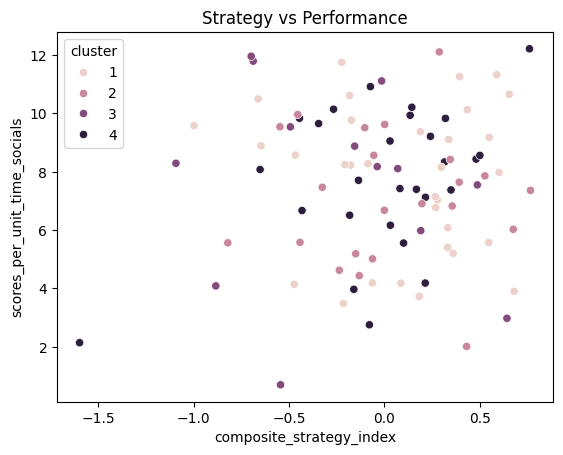

In [480]:
sns.scatterplot(
    data=working_df,
    x='composite_strategy_index',
    y='scores_per_unit_time_socials',
    hue='cluster',
)
plt.title("Strategy vs Performance")
plt.show()